# <center> ANALYZING THE DEPARTURE TREND OF INDIA </center>

The dataset has been collected from https://data.gov.in/ : <br>
- <a href = "https://data.gov.in/resources/destination-wise-number-indian-nationals-departures-india-2009-2016">Dataset: </a>Destination-wise number of Indian Nationals' Departures from India from 2009 to 2016 

Let's explore the Dataset



In [2]:
import sqlite3
conn = sqlite3.connect("Departures_India.db")

In [3]:
import pandas as pd

destination_wise_departures = pd.read_sql_query("select * from Destination_wise_departures",conn)
print(destination_wise_departures[0:5])
print(destination_wise_departures.columns)



        Destination_Country  Number_of_Departures2009  \
0                    Canada                    107959   
1  United States of America                    549474   
2                   Bahamas                       435   
3                  Barbados                       959   
4                    Brazil                     11361   

   Number_of_Departures2010  Number_of_Departures2011  \
0                    127619                    139213   
1                    650935                    663465   
2                       561                       398   
3                      1317                      1230   
4                    181829                     21530   

   Number_of_Departures2012  Number_of_Departures2013  \
0                    146652                    147099   
1                    724433                    859156   
2                       596                       421   
3                       758                       965   
4                     22096  

So, there are 9 columns in the first Dataset. Destination countries and the number of departures from 2009 till 2016. Let's check the total number of countries in the dataset.

In [4]:
print(len(destination_wise_departures['Destination_Country']))

117


So, out of 195 countries of the world, we have the record of 117 countries where people go from India. <br>
Let's check out the top 5 countries people departure the most to in 2016 using sql by importing sqlite3

In [119]:
cursor = conn.cursor()
query = "select Destination_Country,Number_of_Departures2016 from Destination_wise_departures order by Number_of_Departures2016 desc limit 5;"
cursor.execute(query)
top_5_2016 = cursor.fetchall()

In [120]:
top_5_2016

[('Saudi Arabia', 1619454),
 ('Australia', 1259970),
 ('United States of America', 1172256),
 ('Kuwait', 1138733),
 ('Singapore', 1097200)]

Let's check out the country people least go to

In [15]:
query = "select Destination_Country, Number_of_Departures2016 from Destination_wise_departures where Number_of_Departures2016 != 0 order by Number_of_Departures2016 limit 1;"
cursor.execute(query)
least_travelled_country_2016 = cursor.fetchall()

In [16]:
least_travelled_country_2016

[('Cook Islands', 25)]

FYI, Cook Islands is a self governing Island Country near Newzland.  <br>
As the most travelled country is Saudi Arabia, let's watch it's trend over the years.

In [39]:
query = "select * from Destination_wise_departures where Destination_Country='Saudi Arabia';"
cursor.execute(query)
trend_SA = cursor.fetchall()

In [102]:
trend_SA


[('Saudi Arabia',
  247075,
  389116,
  758234,
  1075459,
  1006229,
  1193412,
  1365292,
  1619454)]

We can observe that the departure trend for Saudi Arabia has been increasing over a steady rate.

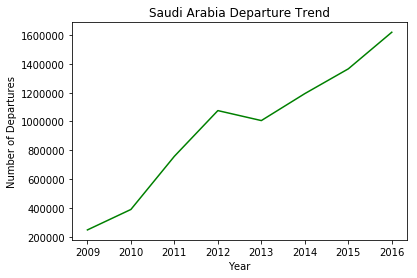

In [110]:
#steady growth
SA_trend = pd.read_sql_query("select * from Destination_wise_departures where Destination_Country='Saudi Arabia';",conn)


import seaborn as sns
import matplotlib.pyplot as plt

x = ['2009','2010','2011','2012','2013','2014','2015','2016'] 
y = [SA_trend['Number_of_Departures2009'],SA_trend['Number_of_Departures2010'],SA_trend['Number_of_Departures2011'],SA_trend['Number_of_Departures2012'],SA_trend['Number_of_Departures2013'],SA_trend['Number_of_Departures2014'],SA_trend['Number_of_Departures2015'],SA_trend['Number_of_Departures2016']]
plt.plot(x,y,color="g")
plt.xlabel("Year")
plt.ylabel("Number of Departures")
plt.title("Saudi Arabia Departure Trend")
plt.show()




Let's check the maximum departures in year 2009

In [113]:
cursor = conn.cursor()
query = "select Destination_Country,Number_of_Departures2009 from Destination_wise_departures order by Number_of_Departures2009 desc limit 5;"
cursor.execute(query)
top_5_2009 = cursor.fetchall()

In [114]:
top_5_2009

[('Kuwait', 733117),
 ('Singapore', 725624),
 ('Thailand', 596529),
 ('Malaysia', 589838),
 ('United States of America', 549474)]

We can observe that in 2009, top countries were all asian, leaving the US. And Saudi Arabia was not even in the top 5 list. 
This can be due to an increase in the trade, work. Let's observe the trend of the most travelled Country of 2009 - KUWAIT

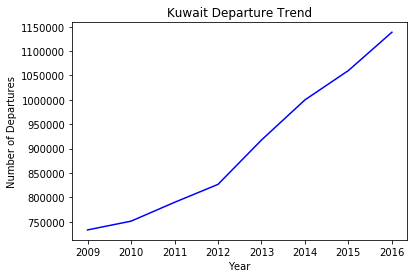

In [116]:
Kuwait_trend = pd.read_sql_query("select * from Destination_wise_departures where Destination_Country='Kuwait';",conn)

x = ['2009','2010','2011','2012','2013','2014','2015','2016'] 
y = [Kuwait_trend['Number_of_Departures2009'],Kuwait_trend['Number_of_Departures2010'],Kuwait_trend['Number_of_Departures2011'],Kuwait_trend['Number_of_Departures2012'],Kuwait_trend['Number_of_Departures2013'],Kuwait_trend['Number_of_Departures2014'],Kuwait_trend['Number_of_Departures2015'],Kuwait_trend['Number_of_Departures2016']]
plt.plot(x,y,color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Departures")
plt.title("Kuwait Departure Trend")
plt.show()


We can observe that Kuwait Departure Trend also is increasing at a rapid rate.

Now, let's check the trend somewhere in between say 2012

In [126]:
cursor = conn.cursor()
query = "select Destination_Country,Number_of_Departures2012 from Destination_wise_departures order by Number_of_Departures2012 desc limit 5;"
cursor.execute(query)
top_5_2012 = cursor.fetchall()

In [127]:
top_5_2012

[('Saudi Arabia', 1075459),
 ('Thailand', 985883),
 ('Bahrain', 963194),
 ('Singapore', 894993),
 ('Kuwait', 826526)]

We didn't find Bahrain treding either in 2009 or in 2016, let's check it's status

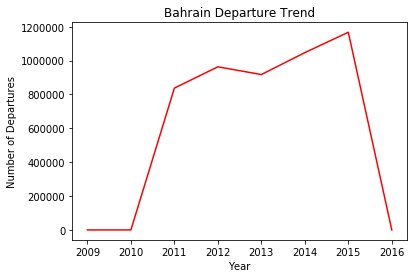

In [131]:
Bahrain_trend = pd.read_sql_query("select * from Destination_wise_departures where Destination_Country='Bahrain';",conn)

x = ['2009','2010','2011','2012','2013','2014','2015','2016'] 
y = [Bahrain_trend['Number_of_Departures2009'],Bahrain_trend['Number_of_Departures2010'],Bahrain_trend['Number_of_Departures2011'],Bahrain_trend['Number_of_Departures2012'],Kuwait_trend['Number_of_Departures2013'],Bahrain_trend['Number_of_Departures2014'],Bahrain_trend['Number_of_Departures2015'],Bahrain_trend['Number_of_Departures2016']]
plt.plot(x,y,color="red")
plt.xlabel("Year")
plt.ylabel("Number of Departures")
plt.title("Bahrain Departure Trend")
plt.show()


We don't have the Bahrain data for 2009,2010,2016, hence the graph is formed such way.

In [132]:
conn.close()